In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [41]:
excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx' 
years = range(2010, 2017)
years[0]

2010

In [42]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [43]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [44]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [45]:
len(all_data)

7

In [46]:
df = pd.concat(all_data, ignore_index = True)
df.head(5)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [47]:
len(df)

22092

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

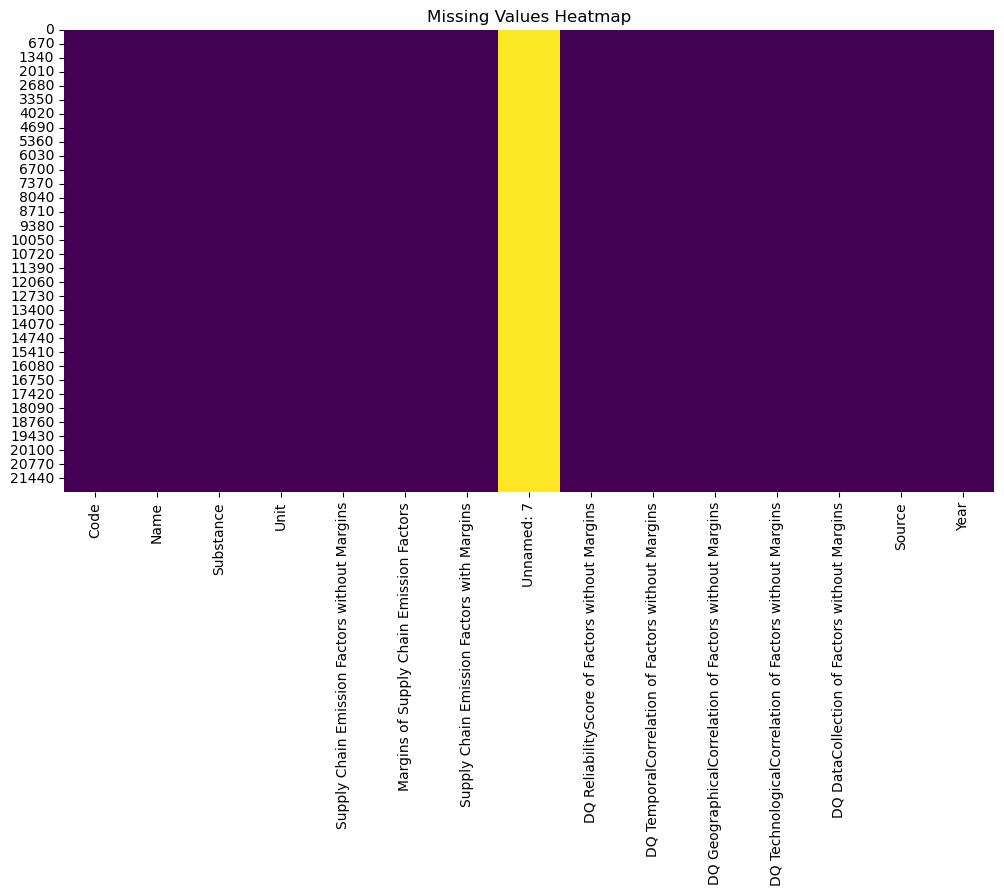

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

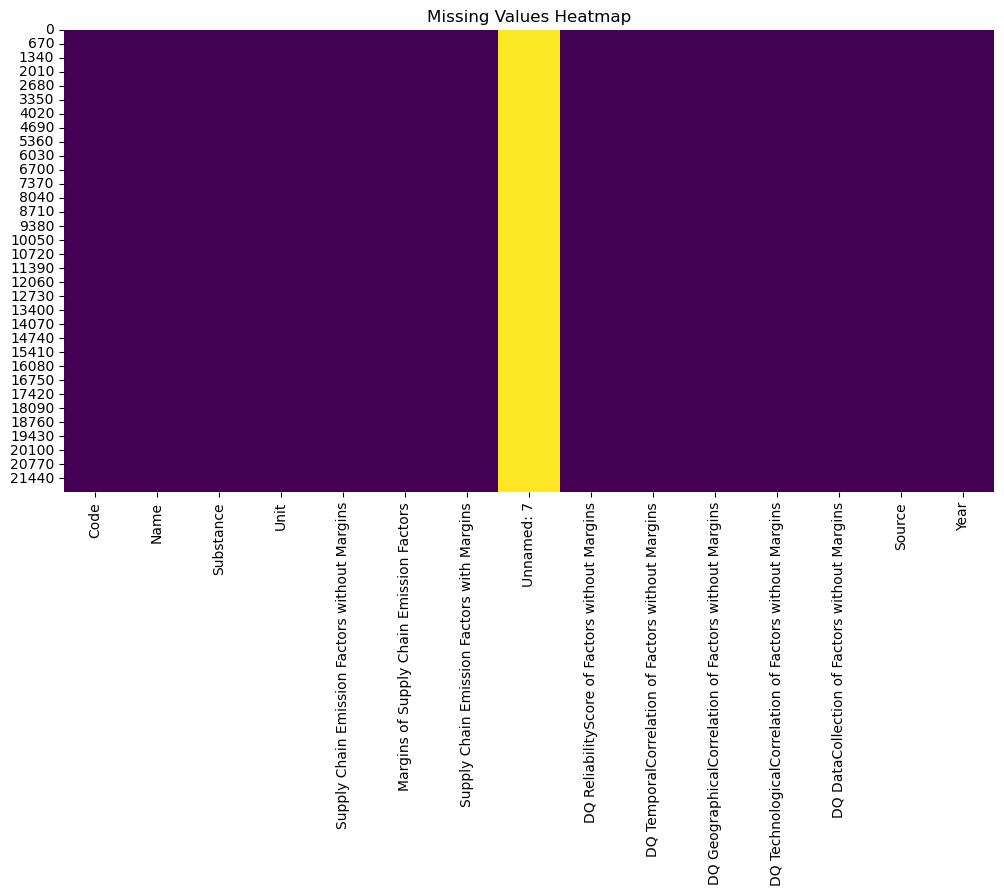

In [48]:
df.info()

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates dropped.")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

df.info()

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates dropped.")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [49]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [52]:
df.isnull().sum()

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

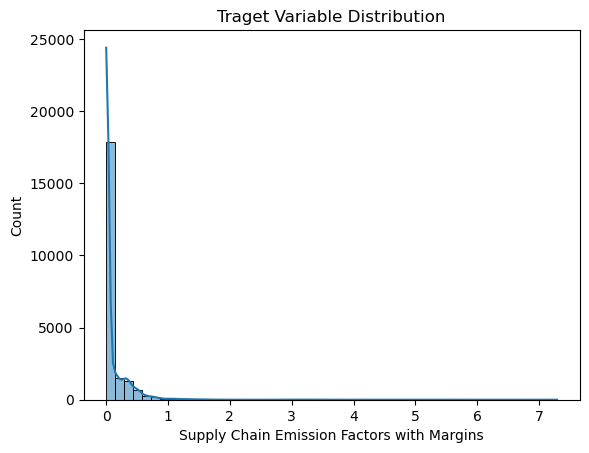

In [53]:
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde = True)
plt.title('Traget Variable Distribution')
plt.show()

In [54]:
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [55]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [56]:
print(df['Unit'].unique()) 

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [57]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [58]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [59]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [60]:
df['Substance']=df['Substance'].map(substance_map) 

In [61]:
df['Substance'].unique()

array([0, 1, 2, 3], dtype=int64)

In [62]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [63]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [64]:
df['Unit']=df['Unit'].map(unit_map)

In [65]:
print(df['Unit'].unique())

[0 1]


In [66]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [67]:
source_map={'Commodity':0, 'Industry':1}

In [68]:
df['Source']=df['Source'].map(source_map)

In [69]:
print(df['Source'].unique())

[0 1]


In [70]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [71]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [72]:
len(df.Name.unique())

713

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors witho

In [74]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10) 

top_emitters = top_emitters.reset_index()

In [75]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


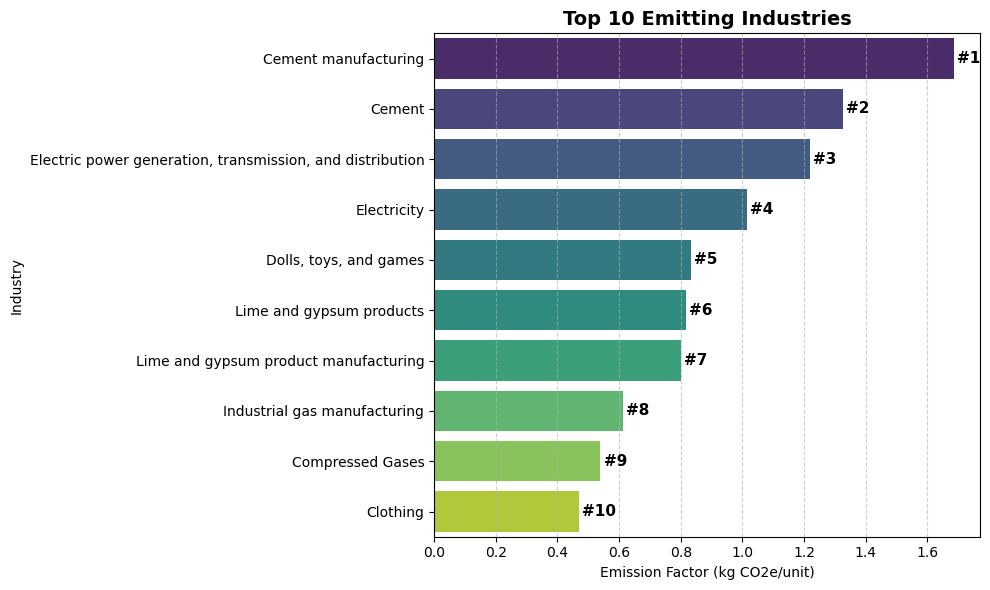

In [90]:
plt.figure(figsize=(10,6))

sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis'
)

for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle = '--', alpha=0.6)
plt.tight_layout()

plt.show()

In [92]:
df.drop(columns=['Name', 'Code','Year'], inplace=True)

In [94]:
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,0.47,NaN,4,3,1,4,1,0


In [96]:
df.shape

(22092, 12)

In [98]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [100]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

In [102]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,NaN,4,3,1,4,1,0
1,1,0,0.001,0.001,NaN,4,3,1,1,1,0
2,2,0,0.002,0.000,NaN,4,3,1,4,1,0
3,3,1,0.002,0.000,NaN,3,3,1,3,1,0
4,0,0,0.659,0.081,NaN,4,3,1,4,1,0


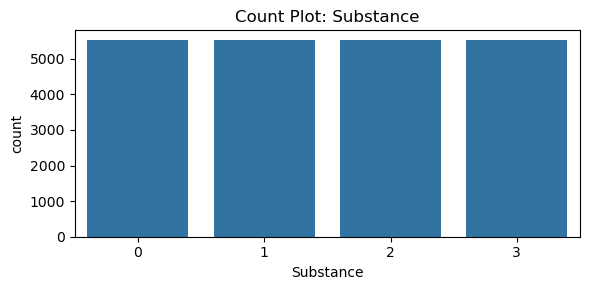

In [104]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df['Substance'])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

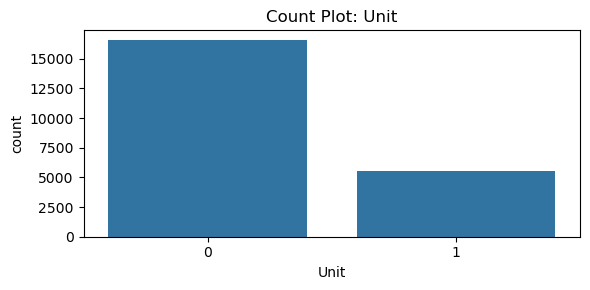

In [106]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

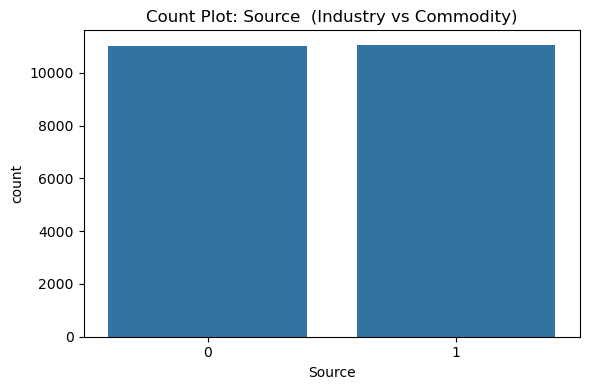

In [108]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source  (Industry vs Commodity)")
plt.tight_layout()
plt.show()

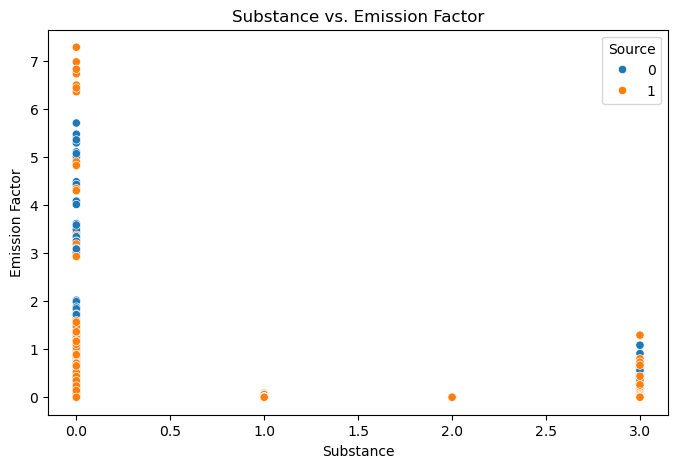

In [110]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Substance'], y=df['Supply Chain Emission Factors with Margins'], hue=df['Source'])
plt.title('Substance vs. Emission Factor')
plt.xlabel('Substance')
plt.ylabel('Emission Factor')
plt.show()

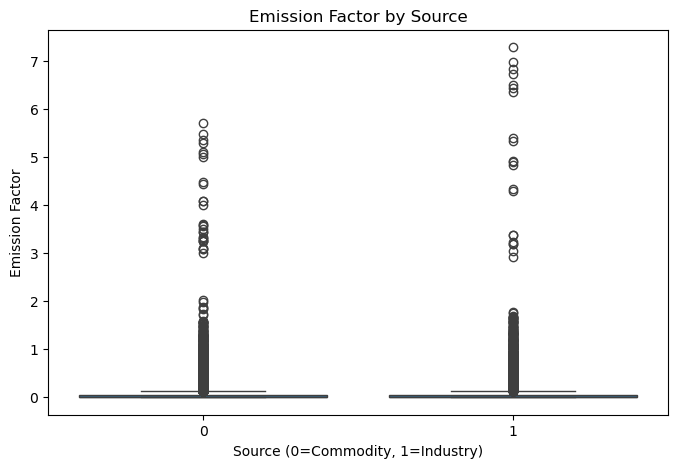

In [111]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df['Source'], y = df['Supply Chain Emission Factors with Margins'])
plt.title('Emission Factor by Source')
plt.xlabel('Source (0=Commodity, 1=Industry)')
plt.ylabel('Emission Factor')
plt.show()

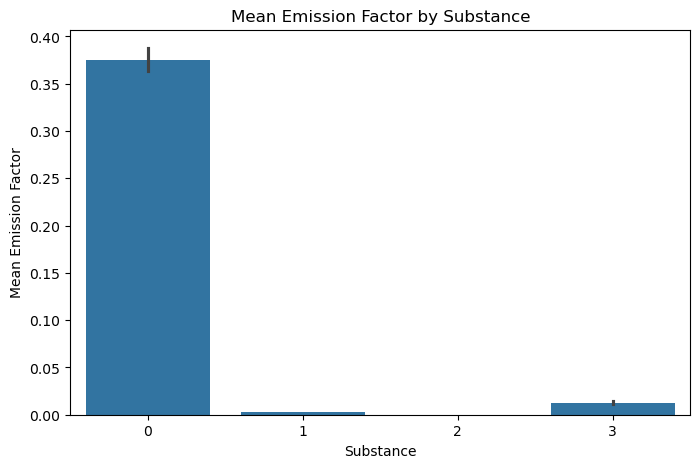

In [112]:
plt.figure(figsize=(8 ,5))
sns.barplot(x = df['Substance'], y = df['Supply Chain Emission Factors with Margins'])
plt.title('Mean Emission Factor by Substance')
plt.xlabel('Substance')
plt.ylabel('Mean Emission Factor')
plt.show()

In [114]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,NaN,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,NaN,-0.025159,-3.173071e-17,NaN,0.286990,NaN,-1.545892e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,NaN,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,NaN,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,NaN,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,NaN,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,NaN,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,NaN,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   Unnamed: 7                                              0 non-null      float64
 6   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 7   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 8   DQ GeographicalCorrelation of Factor

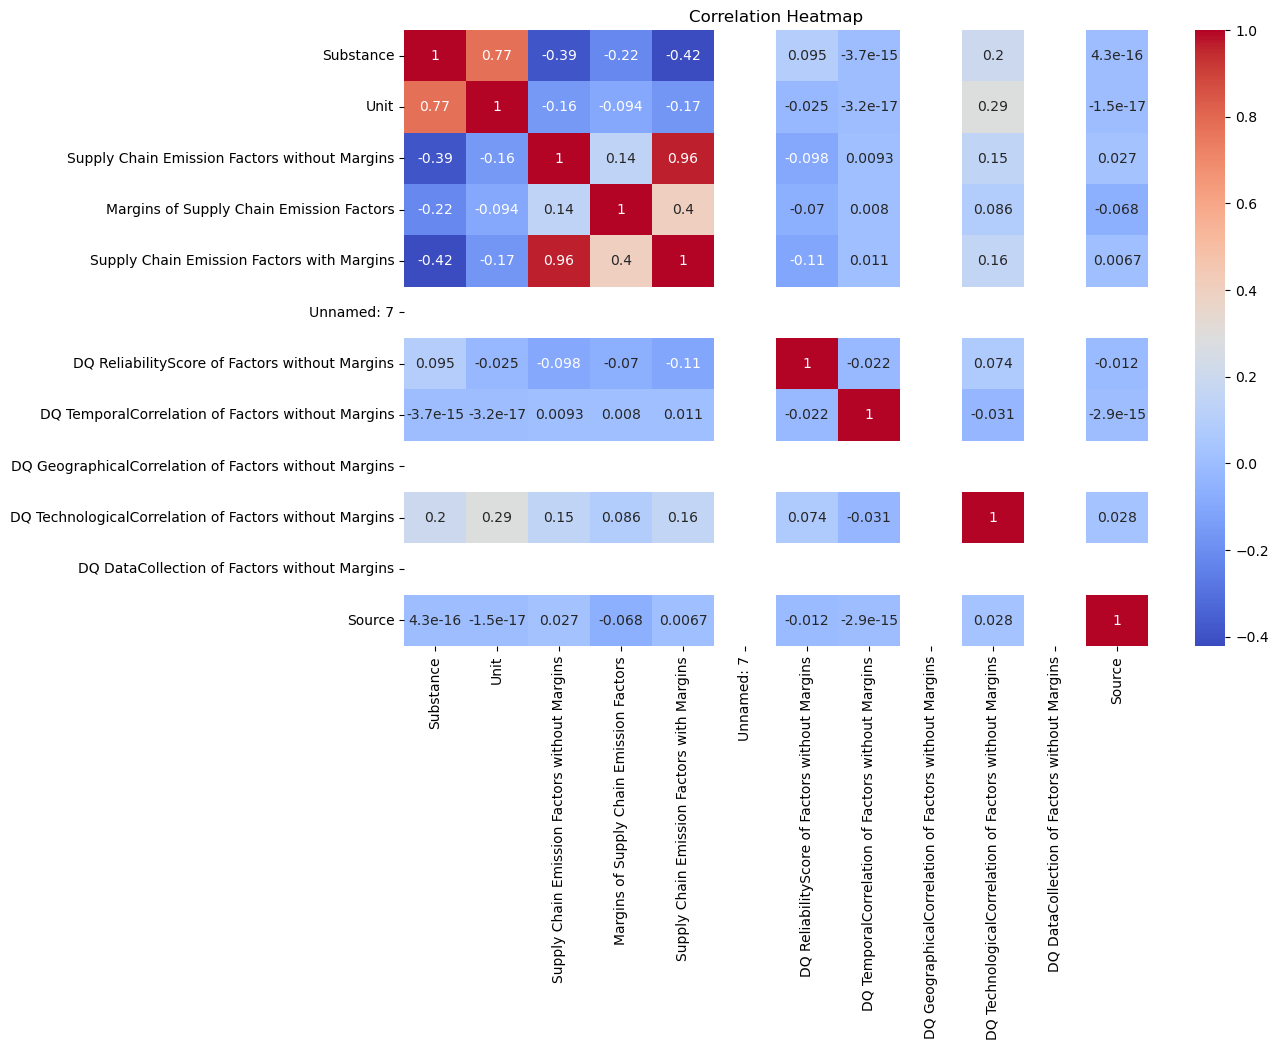

In [118]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include = np.number).corr(), annot = True, cmap ="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [121]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.250000,0.433023,0.0,0.00,0.000,0.250,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000


In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform

In [166]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



C:\Users\skuma\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 7']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [168]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  

mean = np.round(X_scaled.mean(), 2)
std = np.round(X_scaled.std(), 2)

print("Mean:", mean)
print("Std Dev:", std)


Mean: -0.0
Std Dev: 0.89


In [130]:
X.shape


(22092, 11)

In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Splitting data into training and testing sets 


In [ ]:
X_train.shape


In [133]:
RF_model = RandomForestRegressor(random_state=42) 

In [172]:
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [174]:

RF_y_pred = RF_model.predict(X_test)

In [176]:

RF_y_pred[:20]

array([2.93080000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94080000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.15790000e-01, 9.00000000e-03, 0.00000000e+00])

In [178]:

RF_mse = mean_squared_error(y_test, RF_y_pred) 
RF_rmse = np.sqrt(RF_mse) 
# Calculating R² score
RF_r2 = r2_score(y_test, RF_y_pred)

print(f'RMSE: {RF_rmse}')
print(f'R² Score: {RF_r2}')

RMSE: 0.006143789217304181
R² Score: 0.9993280085696331


In [180]:
from sklearn.linear_model import LinearRegression 
LR_model = LinearRegression() 

LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test) 


LR_mse = mean_squared_error(y_test, LR_y_pred)
LR_rmse = np.sqrt(LR_mse)  
LR_r2 = r2_score(y_test, LR_y_pred) 
print(f'RMSE: {LR_rmse}')
print(f'R² Score: {LR_r2}')

RMSE: 0.00028073792916295576
R² Score: 0.9999985968848819


In [182]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [183]:
y_pred_best = best_model.predict(X_test)


HP_mse = mean_squared_error(y_test, y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(y_test, y_pred_best)

print(f'RMSE: {HP_rmse}')
print(f'R² Score: {HP_r2}')

RMSE: 0.005948528382514106
R² Score: 0.9993700440298772


In [184]:
results = {
    'Model': ['Random Forest (Default)', 'Linear Regression', 'Random Forest (Tuned)'],
    'MSE': [RF_mse, LR_mse, HP_mse],
    'RMSE': [RF_rmse, LR_rmse, HP_rmse],
    'R2': [RF_r2, LR_r2, HP_r2]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)

                     Model           MSE      RMSE        R2
0  Random Forest (Default)  3.774615e-05  0.006144  0.999328
1        Linear Regression  7.881378e-08  0.000281  0.999999
2    Random Forest (Tuned)  3.538499e-05  0.005949  0.999370


In [185]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    RF_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error'
)

cv_rmse = np.sqrt(-cv_scores)
print("Cross-validated RMSE for each fold:", cv_rmse)
print("Mean CV RMSE:", cv_rmse.mean())

Cross-validated RMSE for each fold: [0.01372963 0.00489411 0.0067602  0.00431371 0.00622787]
Mean CV RMSE: 0.0071851024310866695


In [186]:
rf_rmse = RF_rmse
lr_rmse = LR_rmse
rf_r2 = RF_r2
lr_r2 = LR_r2

rmse_improvement = ((lr_rmse - rf_rmse) / lr_rmse) * 100

r2_improvement = ((rf_r2 - lr_r2) / abs(lr_r2)) * 100 if lr_r2 != 0 else float('inf')

print(f"Random Forest RMSE improved over Linear Regression by {rmse_improvement:.2f}%")
print(f"Random Forest R² improved over Linear Regression by {r2_improvement:.2f}%")

Random Forest RMSE improved over Linear Regression by -2088.44%
Random Forest R² improved over Linear Regression by -0.07%


In [157]:

!mkdir models 

In [190]:
joblib.dump(best_model, 'models/LR_model.pkl')    # Save the best model 
joblib.dump(scaler, 'models/scaler.pkl') # Save the scaler used for normalization

['models/scaler.pkl']